# ![seaborn](../images/logo-seaborn-wide-lightbg.svg)

[Seaborn web oficial](https://seaborn.pydata.org/)

# Introducción

seaborn es una librería de visualización de datos para Python desarrollada sobre matplotlib. Ofrece una interfaz de alto nivel para la creación de atractivas gráficas. Además, está íntimamente integrada con las estructuras de datos de pandas, lo que permite utilizar el nombre de los DataFrames y campos directamente como argumentos de las funciones de visualización.

seaborn tiene como objetivo convertir la visualización en una parte central de la exploración y comprensión de los datos, generando atractivas gráficas con sencillas funciones que ofrecen una interfaz semejante, facilitando el paso de unas funciones a otras.

La documentación oficial está disponible en el sitio web oficial de seaborn.

Esta librería se importa habitualmente con el alias sns.
* `import seaborn as sns`

Para poder hacer uso de las funciones ofrecidas por seaborn deberás importar previamente la librería con la instrucción anterior. Aunque las capturas de pantalla incluidas en este tutorial no lo muestren, la importación de seaborn se realiza en la primera celda del notebook Jupyter:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
np.random.seed(18)
warnings.filterwarnings("ignore")
sns.set()

Junto a seaborn se importan también las librerías **matplotlib** (pues, en ocasiones, hay que recurrir a ella para acceder a funcionalidad no ofrecida por seaborn), **pandas** y **NumPy** (en algunos ejemplos crearemos estructuras de datos basadas en estas librerías) y la librería warnings para ocultar ciertos mensajes de aviso que genera seaborn (al respecto de futuros cambios de funcionalidad).

En el código mostrado en la imagen anterior (celda In [3]) se inicializa el generador de números aleatorios de **NumPy**, se activa la ocultación de los avisos y se **fija el estilo gráfico de seaborn**.

# Funcionalidad de seaborn

seaborn ofrece varias características destacadas:

* Funciones con una API estandarizada que limita la necesidad de tener que memorizar conjuntos de parámetros diferentes en función del gráfico deseado:

In [3]:
# Carga de datos de ejemplo
df = sns.load_dataset ('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Gráficas visualmente atractivas sin necesidad de realizar complicados ajustes

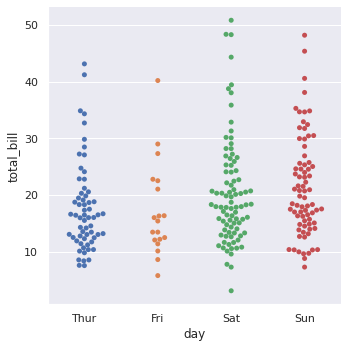

In [5]:
sns.catplot(x = "day", y = "total_bill", kind = "swarm", data = df)

* Una API orientada a conjuntos de datos para examinar la relación entre múltiples variables.

# Funciones a nivel de figura y de ejes

En seaborn hay dos tipos de funciones gráficas: funciones a nivel de figura y funciones a nivel de ejes. Las primeras son funciones de alto nivel que gestionan la figura y el conjunto de ejes que las contiene, así como la leyenda. Funciones de este tipo son [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) y [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html), por ejemplo. Pero estas funciones acaban ejecutando una función a nivel de ejes. ¿Cuál? La indicada por el parámetro **kind**. Veamos, por ejemplo, la siguiente función:

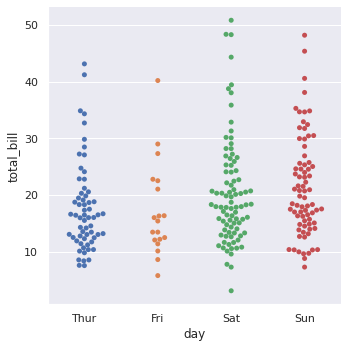

In [7]:

sns.catplot(x = "day", y = "total_bill", kind = "swarm", data = df)

Se trata de una función a nivel de figura que, tras crear la figura y el conjunto de ejes, llamará a la función a nivel de ejes seaborn.swarmplot (cosa que sabemos por el valor del parámetro kind: "swarm") pasándole los valores de x, y y data indicados. Por ejemplo, si, en lugar de la anterior instrucción, llamamos directamente a [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).

..el resultado sería el siguiente:

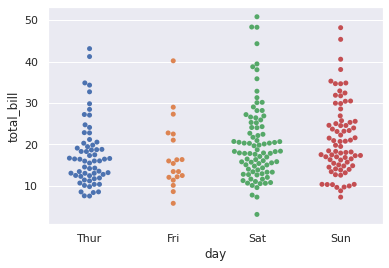

In [9]:
sns.swarmplot(x = "day", y = "total_bill", data = df);

..semejante al anterior, pero quedando en nuestras manos el control de la figura (incluyendo su tamaño) y conjunto de ejes.

Las funciones a nivel de ejes, como la mencionada seaborn.swarmplot, son funciones de más bajo nivel que se crean en un conjunto concreto de exes (que puede ser indicado como argumento) y que, por lo tanto, no influye en el resto de la figura. 

Otro ejemplo: la función a nivel de figura [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) puede ejecutar la función [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (si el parámetro kind toma el valor "scatter") o la función [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) (si el parámetro kind toma el valor "line"). Veremos estas funciones en breve.

A la hora de crear visualizaciones podemos utilizar tanto un tipo como el otro. Tan solo deberemos saber que no podremos controlar la figura ni el eje de las funciones a nivel de figura, cosa que sí podremos hacer con las funciones a nivel de eje. Posiblemente las funciones a nivel de figura son más apropiadas para análisis exploratorio, pues no tenemos que molestarnos en crear la figura, la leyenda, etc.

Podemos distinguir unas funciones de otras viendo si admiten el parámetro **ax**: Si lo admiten, se trata de funciones a nivel de ejes. Otra forma de saberlo es viendo el tipo del resultado que devuelven: si se trata de un objeto tipo "axes" de matplotlib, se trata de una función a nivel de ejes. Si, por el contrario, se trata de un objeto "FacetGrid", es una función a nivel de figura.

# Datasets
seaborn incluye un interesante conjunto de datasets que pueden ser utilizados para probar las distintas visualizaciones. La función disponible para la carga de estos conjuntos de datos es [seaborn.load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), devolviendo un dataframe pandas. A lo largo de este tutorial se utilizarán algunos de estos datasets:

* **flights:**

In [13]:
flights = sns.load_dataset("flights")
flights.sample(5)

,year,month,passengers
40,1952,May,183
18,1950,Jul,170
46,1952,Nov,172
60,1954,Jan,204
66,1954,Jul,302


Dataset con información sobre pasajeros transportados en avión por mes entre 1949 y 1960. Las cifras de pasajeros probablemente hacen referencia a "miles" de pasajeros (no está documentado).

* **titanic:**

In [14]:
titanic = sns.load_dataset("titanic")
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
115,0,3,male,21.0,0,0,7.925,S,Third,man,True,NaN,Southampton,no,True
729,0,3,female,25.0,1,0,7.925,S,Third,woman,False,NaN,Southampton,no,False
712,1,1,male,48.0,1,0,52.000,S,First,man,True,C,Southampton,yes,False
690,1,1,male,31.0,1,0,57.000,S,First,man,True,B,Southampton,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True


Famoso conjunto de datos con información sobre los pasajeros del último viaje del Titanic, con información sobre quiénes sobrevivieron, su edad, sexo, clase en la que viajaban...

* **iris:**

In [15]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor
32,5.2,4.1,1.5,0.1,setosa
77,6.7,3.0,5.0,1.7,versicolor
55,5.7,2.8,4.5,1.3,versicolor


Otro de los clásicos, con información de la longitud y ancho de pétalos y sépalos de 150 flores Iris de tres especies relacionadas.

* **tips:**

In [4]:
tips = sns.load_dataset("tips")
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
58,11.24,1.76,Male,Yes,Sat,Dinner,2
148,9.78,1.73,Male,No,Thur,Lunch,2


En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no...

[En este enlace](https://github.com/mwaskom/seaborn-data) puedes descargar los ficheros en formato CSV contenidos en todos los datasets de seaborn.

# Clasificación de funciones

Vamos a dividir las funciones de visualización de seaborn en las siguientes categorías:

* **Distribuciones:** Gráficas que muestran la distribución de una, dos o más variables.
    * Distribuciones univariadas
    * Distribuciones bivariadas
    * Distribuciones de varias variables
* **Relaciones entre variables cuantitativas:** Diagramas de dispersión y de líneas, involucrando dos variables cuantitativas.
    * Diagramas de dispersión
    * Gráficos de líneas
    * Gráficos de líneas con agregación
* **Relaciones entre variables cuantitativas y cualitativas:** Diagramas que muestran la relación entre variables cuando una o más son de tipo cualitativo o categórico.
    * Diagramas de dispersión categóricos
    * Diagramas de distribución categórica
    * Gráficas de estimación categórica
* **Modelos estadísticos:** Generación y dibujo de sencillos modelos lineales sobre nuestros datos.
    * Regresiones lineales
    * Regresiones polinomiales
    * Regresiones logísticas
    *Regresiones en otros contextos
* **Mapas de calor**

# Distribuciones
Una de las primeras cosas que normalmente queremos hacer ante un conjunto de datos es analizar la distribución de sus características, tanto consideradas independientemente como por parejas. Estas visualizaciones nos van a dar una primera visión general del perfil de nuestros datos: si son simétricos, si están muy repartidos, si tienen outliers...

En este primer bloque de funciones vamos a revisar las herramientas que ofrece seaborn con este objetivo.

## Distribuciones univariadas

En este tipo de gráficas estamos analizando la distribución de una variable, es decir, como se reparten los valores a lo largo del dominio de ésta. La mejor forma de mostrar la distribución de una variable es utilizar la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Por defecto, esta función muestra un histograma y una estimación de densidad Kernel:

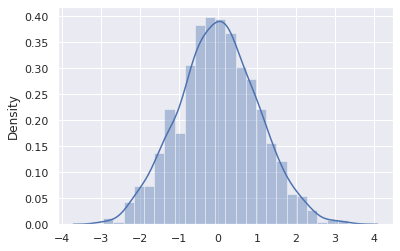

In [17]:
y = np.random.normal(size = 1000)
sns.distplot(y);

Ésta no es, en todo caso, la única función que podemos usar para mostrar la distribución de una variable, pues también disponemos de las funciones [seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) y [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Revisemos las tres opciones.

### Rug plot
La primera opción que tenemos es la llamada en inglés "rug plot" (¿gráfica de alfombrilla?). Este tipo de gráficas muestra la distribución de una variable con marcas representando los valores en un único eje. Desde cierto punto de vista son semejantes a los histogramas con bins de un ancho igual a cero (de forma que cada valor tenga su propio bin y éstos tengan todos una misma altura). También puede ser comparado a un gráfico de dispersión de una sola variable.

En seaborn disponemos de la función [seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) con este fin:

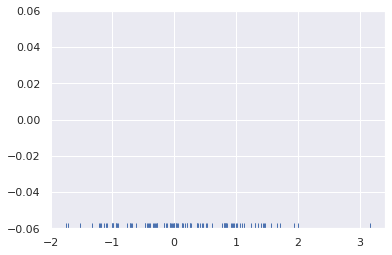

In [18]:
y = np.random.normal(size = 100)
sns.rugplot(y);

El único argumento obligatorio es el array conteniendo los puntos. Es posible controlar la altura de las marcas y el eje en el que se va a mostrar con los parámetros **height** y **axis**, respectivamente. En el siguiente ejemplo se personalizan ambos:

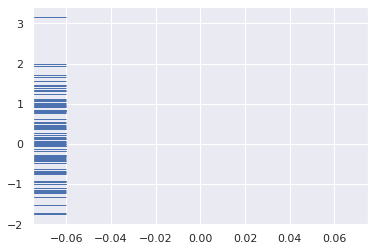

In [19]:
sns.rugplot(y, height = 0.1, axis = "y");

Ésta es una función a nivel de ejes, lo que implica que puede ser mostrada en un conjunto de ejes cualquiera.

## Histogramas
Podemos mostrar un histograma usando la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) si ocultamos la estimación de densidad Kernel, cosa que podemos conseguir con el parámetro kde:

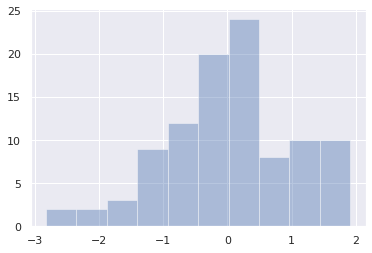

In [20]:
y = np.random.normal(size = 100)
sns.distplot(y, kde = False);

Podemos incluir el "rug" también en el histograma, utilizando el parámetro homónimo:

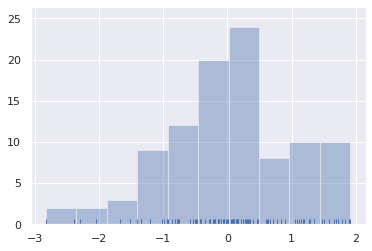

In [21]:
sns.distplot(y, kde = False, rug = True);

Por último, el número de bins se controla con el parámetro del mismo nombre:

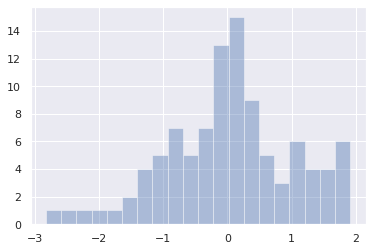

In [22]:
sns.distplot(y, kde = False, bins = 20);

## Estimación de densidad kernel
La estimación de densidad kernel (KDE) es menos usada que el histograma, pero puede ser una útil herramienta para mostrar la distribución de una variable. Al igual que aquel, los KDE codifican la densidad de observaciones en un eje mostrando una altura proporcional en el otro eje, pero los KDE pueden ser dotados de propiedades como la suavidad o continuidad.

Para construir el KDE se considera una función no negativa -el kernel- y un parámetro de suavizado denominado bandwidth. Cuando el kernel es una función gaussiana, cada observación es sustituida por una curva de este tipo centrada en dicho valor. A continuación, se suman las curvas para obtener el valor de la densidad en cada punto. Por último, la curva resultante se normaliza para que el área bajo ella sea igual a 1.

Usando la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) basta con ocultar el histograma -lo que controlamos con el parámetro hist- para obtener el KDE:

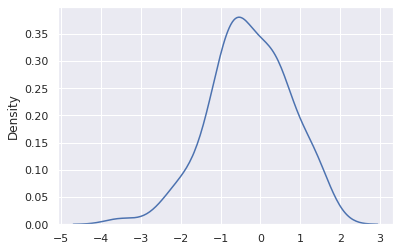

In [23]:
y = np.random.normal(size = 100)
sns.distplot(y, hist = False);

También aquí tenemos a disposición el "rug":

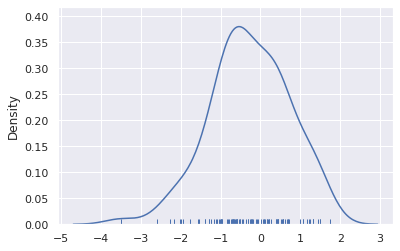

In [24]:
sns.distplot(y, hist = False, rug = True);

## kde plot
También podemos mostrar el KDE utilizando la función seaborn.kdeplot. Esta función permite mucho más control sobre la gráfica resultante que la función seaborn.distplot. Si pasamos como primer argumento el conjunto de valores y calculado en la sección anterior, obtenemos exactamente la misma gráfica:

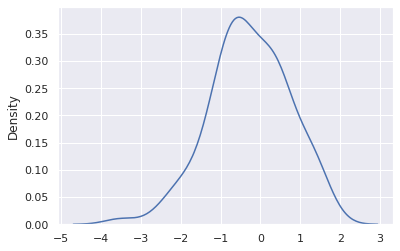

In [25]:
sns.kdeplot(y);

Con el parámetro **bw** ("bandwidth") podemos controlar el grado de ajuste de la curva a los datos. Por ejemplo:

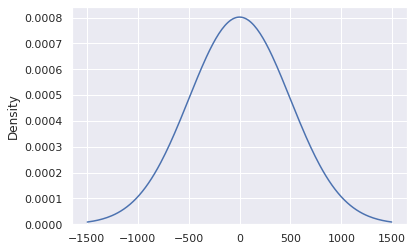

In [28]:
sns.kdeplot(y, bw = 500);

## Ajuste de distribuciones paramétricas
También es posible utilizar la función sns.distplot para comprobar visualmente hasta qué punto los datos involucrados en el análisis se ajustan a una distribución paramétrica. Para probarla, podemos, por ejemplo, generar 250 valores aleatorios extraídos de una distribución gamma y comprobar el ajuste de estos datos con una distribución, digamos, gaussiana:

In [29]:
from scipy import stats

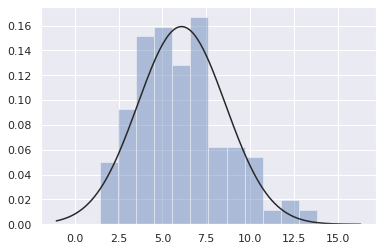

In [30]:
y = np.random.gamma(6, size = 250)
sns.distplot(y, kde = False, fit = stats.norm);

Si lo repetimos ajustando los mismos datos a una distribución gamma, el resultado es el esperado, comprobando que los datos se ajustan a esta distribución:

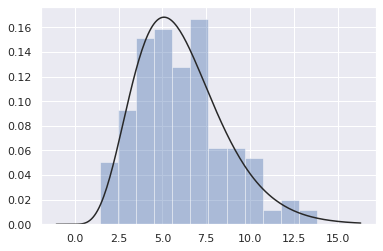

In [31]:
sns.distplot(y, kde = False, fit = stats.gamma);

## Distribuciones bivariadas
Otro de los escenarios en los que podemos encontrarnos es aquel en el que deseamos evaluar la distribución conjunta de dos variables. Podemos utilizar la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) con este fin. Esta función nos muestra una figura multipanel en la que se incluye una gráfica principal mostrando la distribución conjunta de las dos variables en análisis y la distribución marginal de cada una de las variables por separado.

### Gráfico de dispersión
El comportamiento por defecto de la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) es mostrar un gráfico de dispersión de las dos variables siendo analizadas y un histograma adicional para cada una de ellas:

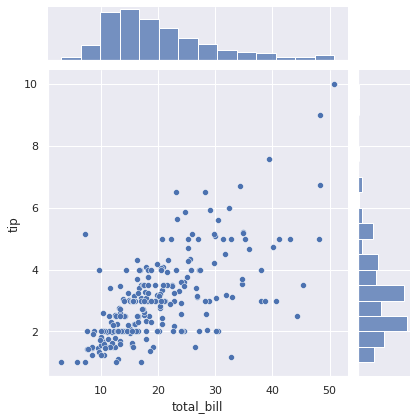

In [32]:
tips = sns.load_dataset("tips")
sns.jointplot(x = "total_bill", y = "tip", data = tips);

En el gráfico anterior estamos cruzando las variables total_bill y tip del dataset tips, y vemos en el centro el gráfico de dispersión de ambas variables, así como los histogramas de cada variable en la parte superior y lateral derecho.

El parámetro **kind** de la función sns.jointplot toma por defecto el valor "scatter", por lo que las dos funciones siguientes son equivalentes:

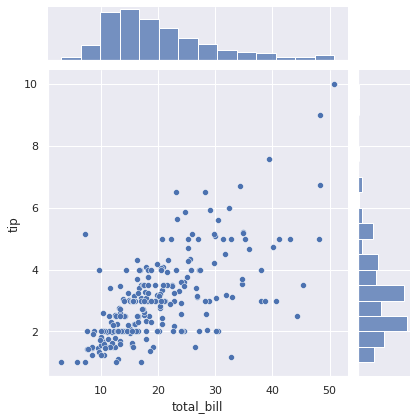

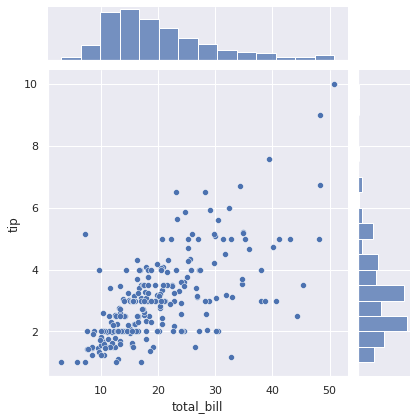

In [33]:
sns.jointplot(x = "total_bill", y = "tip", data = tips);

sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "scatter");

### Gráfico de dispersión hexagonal
Una alternativa al gráfico de dispersión es el gráfico de dispersión hexagonal, en el que el plano se divide en hexágonos y se muestra con distintos colores el número de valores o puntos en cada hexágono:

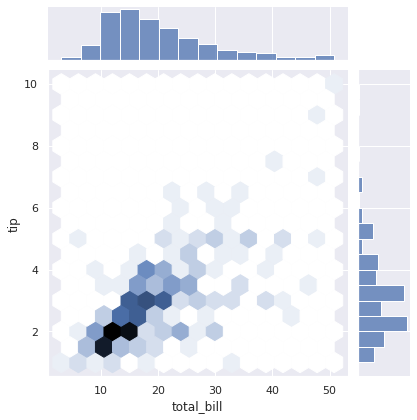

In [34]:
tips = sns.load_dataset("tips")
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex");

Vemos que el único cambio con repecto a la función equivalente que genera el gráfico de dispersión es la inclusión del argumento kind = "hex".

Para controlar el número de hexágonos a mostrar tenemos que hacer uso del parámetro joint_kws. Este parámetro es un diccionario que nos permite pasar a la función parámetros adicionales, como gridsize, parámetro que controla exactamente el número de hexágonos:

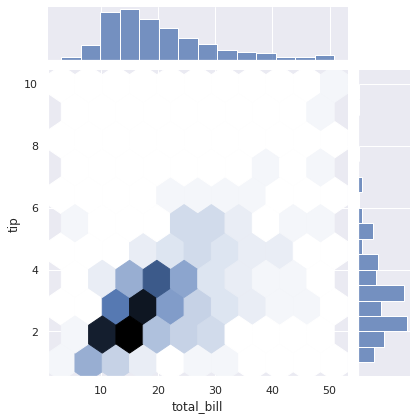

In [35]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex", joint_kws = {"gridsize":10});

### Estimación de densidad kernel
También podemos mostrar en la gráfica principal la estimación de densidad kernel para visualizar la distribución bivariada. Para ello no tenemos más que pasar a la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) el argumento **kind = "kde"**:



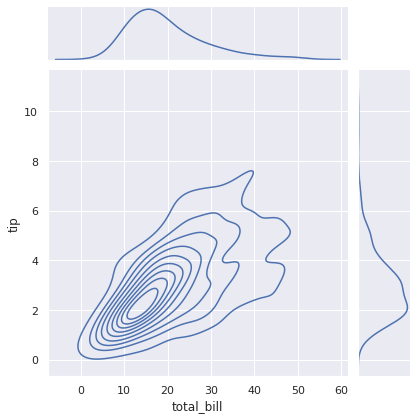

In [36]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde");

### La función kdeplot para distribuciones bivariadas
También es posible utilizar la función [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) ya vista para mostrar la distribución de dos variables. Para esto basta con pasar como primeros argumentos las referencias a las característica en cuestión.

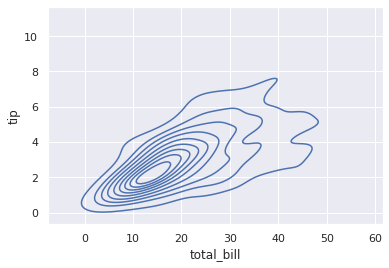

In [37]:
tips = sns.load_dataset("tips")
sns.kdeplot(tips["total_bill"], tips["tip"]);

El parámetro **shade**, cuando toma el valor True, rellena los contornos:

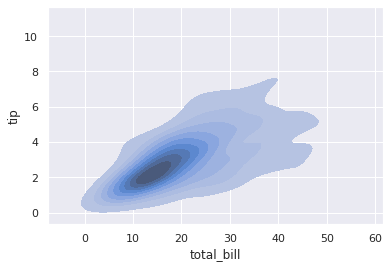

In [38]:
sns.kdeplot(tips["total_bill"], tips["tip"], shade = True);

El parámetro **n_levels** controla el número de niveles distintos a mostrar:

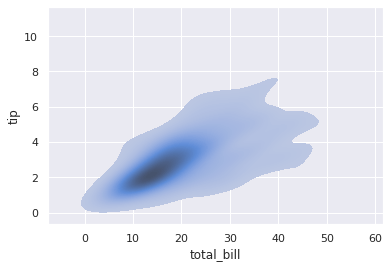

In [39]:
sns.kdeplot(tips["total_bill"], tips["tip"], shade = True, n_levels = 100);

## Distribuciones de varias variables
Con el fin de de visualizar múltiples distribuciones bivariadas de conjuntos de datos podemos recurrir a la función [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Esta función a nivel de figura crea una matriz de ejes y muestra la distribución de cada par de características:

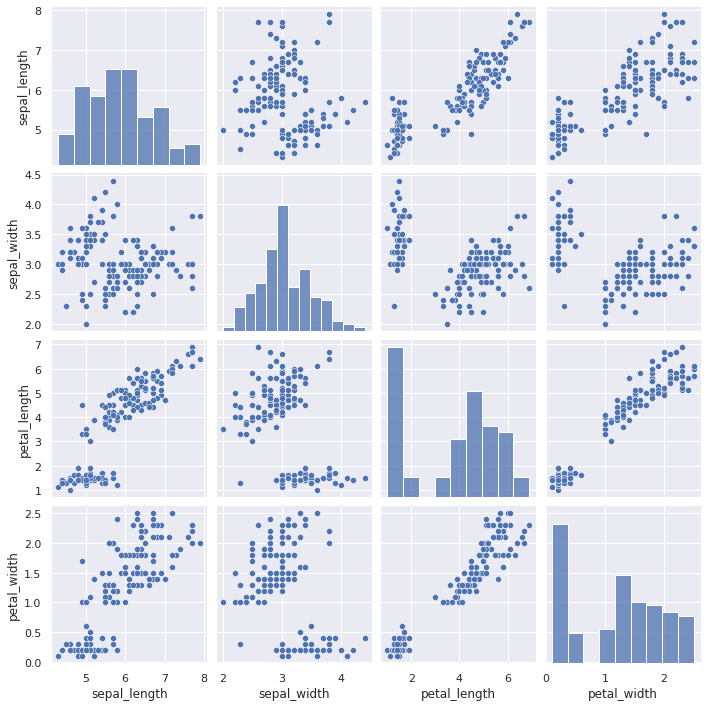

In [40]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Vemos que en la diagonal principal se muestran las distribuciones univariadas de cada característica.

## Relaciones entre variables cuantitativas
Otra tarea fundamental en el proceso de análisis exploratorio de un conjunto de datos es entender cuál es la relación entre variables. De hecho, ya hemos visto una forma de visualizar esta relación usando la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) que muestra, por defecto, un diagrama de dispersión. En esta sección veremos la funcionalidad ofrecida por la función [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) que permite, no solo crear gráficos de dispersión, sino también gráficos de líneas. Se trata ésta de una función a nivel de figura que, en función del valor que tome el parámetro kind, ejecutará, a su vez, las funciones a nivel de ejes [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (cuando kind tome el valor "scatter", valor por defecto) o [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) (cuando kind tome el valor "line").



### Diagrama de dispersión
La función seaborn.relplot muestra, por defecto, un diagrama de dispersión de las dos variables pasadas como argumentos:

In [41]:
iris = sns.load_dataset("iris")

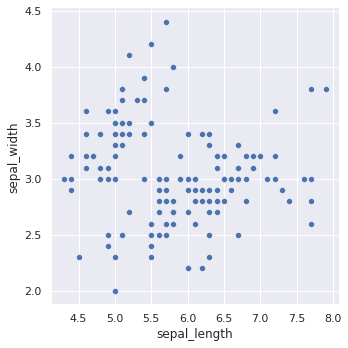

In [42]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris);

Estas variables suelen ser cuantitativas pues, en el caso de que alguna de ellas sea cualitativa, seaborn ofrece gráficas más adecuadas para visualizar la relación entre ellas, como veremos más adelante.

El comportamiento por defecto de la función sns.relplot es el correspondiente al argumento kind = "scatter". Es decir, las dos siguientes instrucciones son equivalentes:

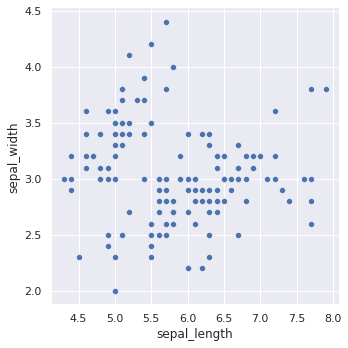

In [43]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris);

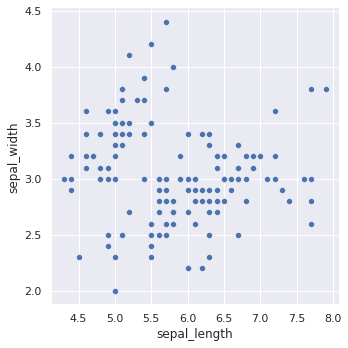

In [44]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris, kind = "scatter");

Es posible añadir una dimensión adicional utilizando el parámetro **"hue"** ("tonalidad" en español). Éste controla el color de los puntos:

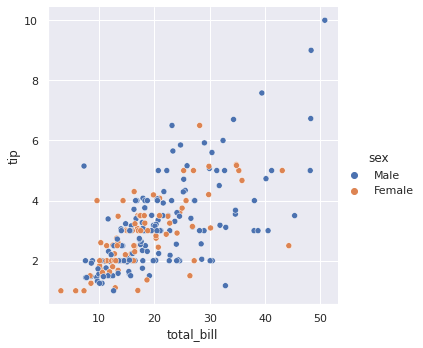

In [45]:
tips = sns.load_dataset("tips")
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips);

En el caso anterior se ha utilizado una variable cualitativa para establecer el color de los puntos, lo que resulta muy sencillo de interpretar (si su cardinalidad no es muy elevada: si tuviésemos 28 valores distintos en la variable "sex" probablemente no sería tan fácilmente interpretable). También podemos utilizar una variable cuantitativa, aunque esto eleva ligeramente la complejidad de la gráfica. Por ejemplo, si mostramos por colores el número de comensales (característica "size"), el resultado es el siguiente:

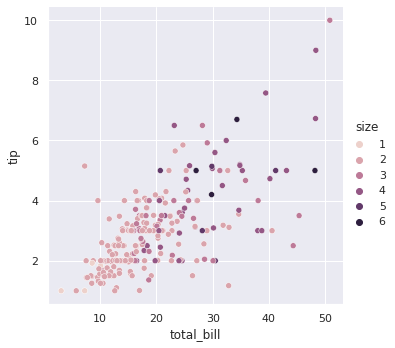

In [46]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", data = tips);

Obsérvese como, en este caso, seaborn ha cambiado la paleta de colores a una secuencial.

El parámetro **style** permite añadir una dimensión adicional al aplicar un marcador diferente a cada uno de los puntos en función de los valores de la variable que se indique. Si se está añadiendo este criterio de segmentación a una gráfica en la que ya estuviésemos haciendo uso del color (parámetro hue) para segmentar los datos, el resultado puede resultar claramente difícil de interpretar. Por ejemplo, en la siguiente gráfica se modifica la anterior para añadir símbolos distintos en función de que la comida haya sido almuerzo o cena:

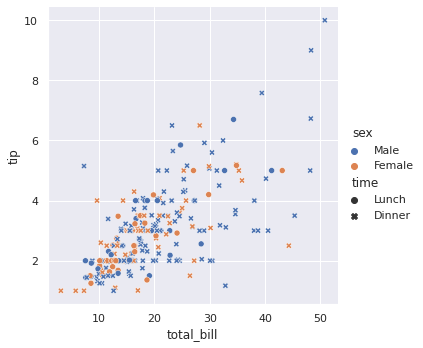

In [47]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "time");

El resultado, efectivamente, no transmite el mensaje con la facilidad que desearíamos (y en este caso solo tenemos dos valores en la variable sex y otros dos en la variable time. Si su cardinalidad fuese mayor, el resultado sería todavía más confuso). Lo que sí podemos hacer es utilizar este herramienta para cambiar los puntos no solo por color según el valor de la variable sex, sino también por símbolo, para reforzar el mensaje:

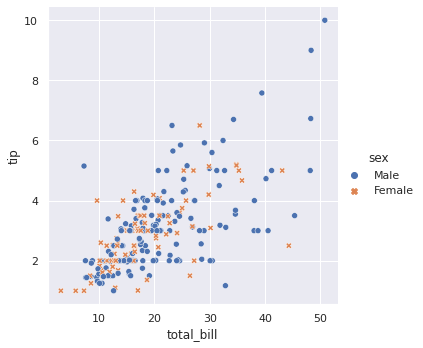

In [48]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "sex");

La tercera alternativa para añadir una nueva dimensión a los datos es mediante el tamaño de los puntos, lo que podemos conseguir con el parámetro **size**:

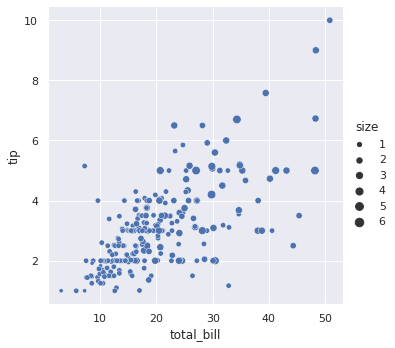

In [49]:
sns.relplot(x = "total_bill", y = "tip", size = "size", data = tips);

En la imagen anterior estamos modificando el tamaño del punto en función del número de comensales (campo size del conjunto de datos).

Como se ha comentado, la función seaborn.relplot ejecuta, por defecto, la función seaborn.scatterplot (siendo ésta última una función a nivel de ejes). De esta forma, la anterior gráfica puede ser también creada con la siguiente instrucción:

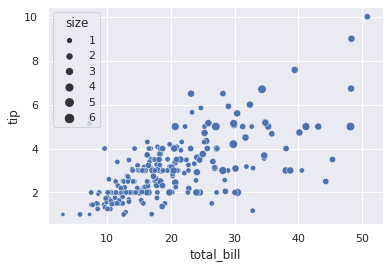

In [50]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = tips);

El único cambio apreciable es el tamaño de la gráfica, pero no olvidemos que las funciones a nivel de figura crean y controlan la figura y el conjunto de ejes según sus propios criterios.

### Deshabilitando la leyenda
En ocasiones puede ser conveniente ocultar la leyenda de la gráfica. Para ello, basta con añadir el argumento legend = False. De esta forma, si repetimos el gráfico anterior con esta modificación:

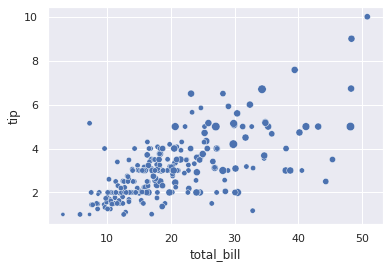

In [51]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = tips, legend = False);

...vemos que no se ha mostrado.

## Gráfico de líneas
Un caso especial de la gráfica de dispersión es la que muestra la relación entre dos variables cuando existe una dependencia, por ejemplo, cuando tenemos datos de una variable a lo largo del tiempo, del espacio o de otra variable cuantitativa continua. Este tipo de gráficas pueden conseguirse con la función seaborn.relplot con el argumento kind = "line":

In [52]:
df = pd.DataFrame({
    "x": range(100),
    "y": np.random.randn(100).cumsum()
})

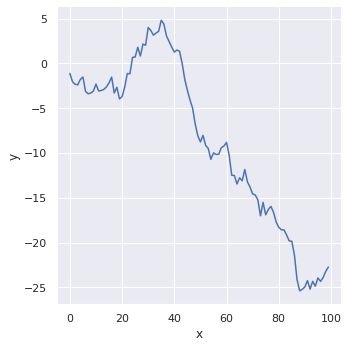

In [53]:
sns.relplot(x = "x", y = "y", data = df, kind = "line");

Esta misma gráfica (salvo por el tamaño) puede conseguirse con la función a nivel de ejes seaborn.lineplot:

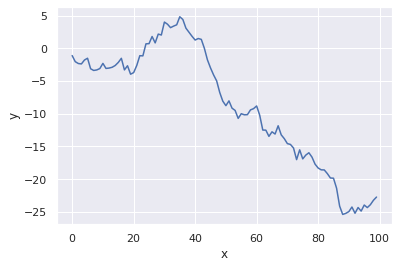

In [54]:
sns.lineplot(x = "x", y = "y", data = df);

Por supuesto, aun cuando estemos mostrando el gráfico de líneas, seguimos teniendo a nuestra disposición las herramientas vistas para esta función, controlables mediante los parámetros hue, size y style. Esto lo veremos en breve.

Echemos un vistazo antes a las gráficas de líneas con agregación de datos.

### Gráfico de líneas con agregación
Un caso especial de gráficos de líneas lo encontramos cuando para cada valor de x puede existir más de un valor y. En estos casos, el comportamiento por defecto de seaborn es mostrar el valor medio de los valores y el intervalo de confianza del 95%. Un ejemplo de este tipo lo encontramos en el dataset de ejemplo flights, con información del número de pasajeros transportados por mes y por año:

In [55]:
flights = sns.load_dataset("flights")
flights.sample(5)

,year,month,passengers
125,1959,Jun,472
5,1949,Jun,135
81,1955,Oct,274
127,1959,Aug,559
94,1956,Nov,271


Mostremos la gráfica de líneas de pasajeros transportados por año:

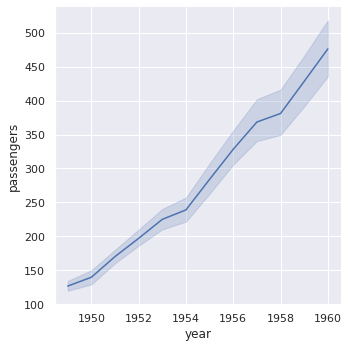

In [56]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights);

La línea principal mostrada de color azul oscuro es el valor medio de los pasajeros transportados el año correspondiente, y el área azul claro por encima y por debajo supone el intervalo de confianza del 95%. Este intervalo es calculado usando [bootstrapping](https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica)).

El parámetro ci (confidence interval) controla el comportamiento de esta opción. Puede tomar como valores un número, el texto "sd", False o None. En el primer caso indicará el intervalo de confianza a aplicar (habrá que indicar un número entero entre 0 y 100. El valor por defecto, como hemos visto, es 95). En el siguiente ejemplo se muestra la misma gráfica con un intervalo de confianza del 40%:

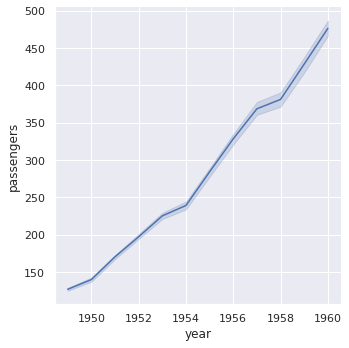

In [57]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = 40);

Si toma el valor "sd" se mostrará la desviación estándar de los datos:



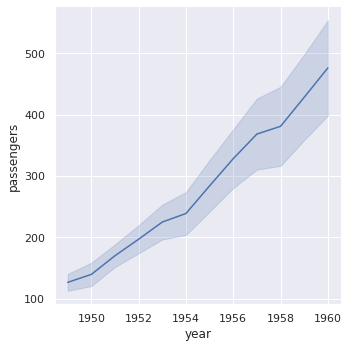

In [58]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = "sd");

Por último, pasando al parámetro el valor None o False se desactiva el cálculo del intervalo de confianza:

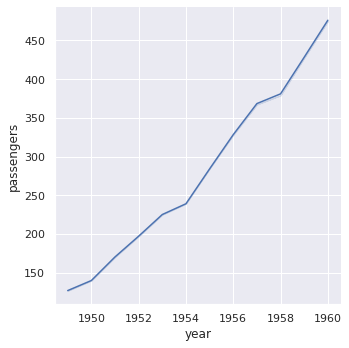

In [59]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = False);

De hecho, todos los ejemplos anteriores han mostrado un intervalo de confianza en torno al valor medio de los datos, pero es posible agregarlos según otros métodos de pandas utilizando el parámetro **estimator**. Por ejemplo, según la mediana:

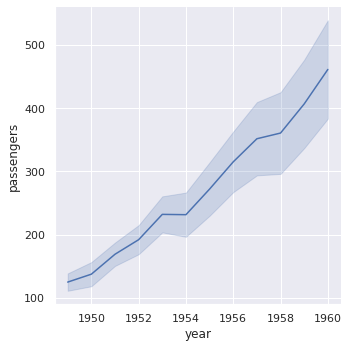

In [60]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, estimator = "median", ci = "sd");

...según el valor máximo:

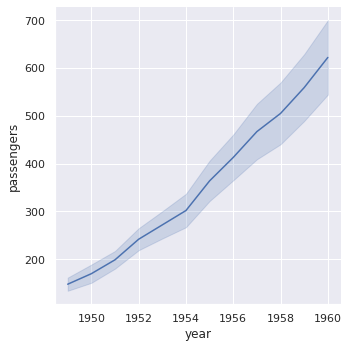

In [61]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, estimator = "max", ci = "sd");

Usando la función a nivel de ejes equivalente, sns.lineplot, podemos mostrar la gráfica anterior con tres estimadores (correspondientes al valor medio, máximo y mínimo) y ver cómo se representa cada uno:

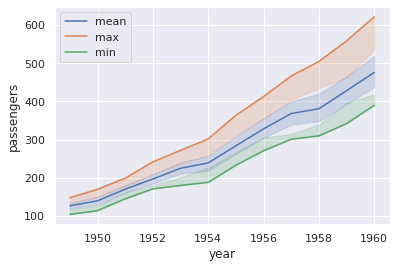

In [62]:
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "mean", label = "mean");
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "max", label = "max");
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "min", label = "min");

## Variables visuales en gráficos de líneas
Ya comentamos que la función seaborn.relplot (y su correspondiente función a nivel de ejes cuando se muestran gráficos de líneas, seaborn.lineplot) tienen las mismas opciones de agregación de nuevas dimensiones de información que la función seaborn.scatterplot. Veámoslas una a una, y para ello partamos del dataset fmri:

In [63]:
fmri = sns.load_dataset("fmri")
fmri.sample(5)

,subject,timepoint,event,region,signal
966,s1,7,cue,frontal,-0.053825
239,s12,1,stim,parietal,0.010625
782,s1,17,cue,frontal,-0.000439
313,s5,3,stim,frontal,0.086629
883,s0,13,cue,parietal,-0.035780


Este dataset muestra información de señales captadas en diferentes regiones del cráneo, de diferentes sujetos, en diferentes momentos, y debido a diferentes eventos (sea lo que sea que esto significa, pues esta información no está documentada). Es decir, para un momento determinado (campo timepoint) tendremos varias señales. Mostremos ambos campos en una gráfica de líneas básica:

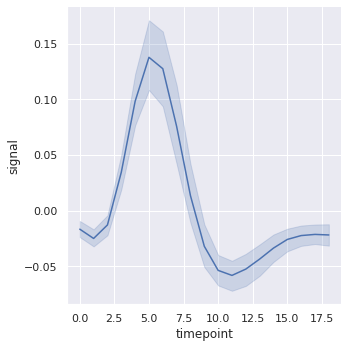

In [64]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line");

Pues bien, podemos dividir la línea mostrada en dos según el evento que genera la señal, mostrando cada una de un color distinto, usando el parámetro **hue**:

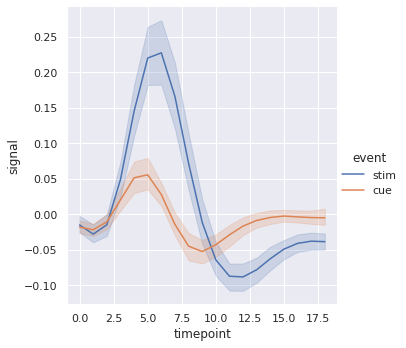

In [65]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", hue = "event");

El parámetro **style** también provoca la disgregación de la curva inicial en varias, en este caso diferenciadas por el estilo de línea:

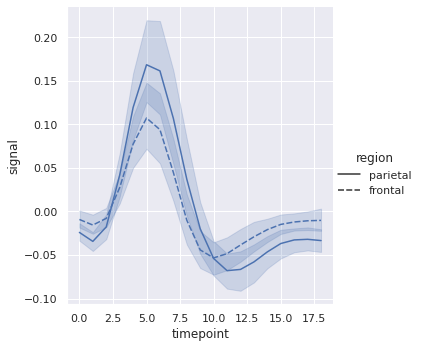

In [66]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", style = "region");

Por último, también es posible modificar el tamaño de las líneas, aunque si no existe una relación directa entre éste y las cifras representadas por cada línea, difícilmente será correctamente interpretada esta variable visual:

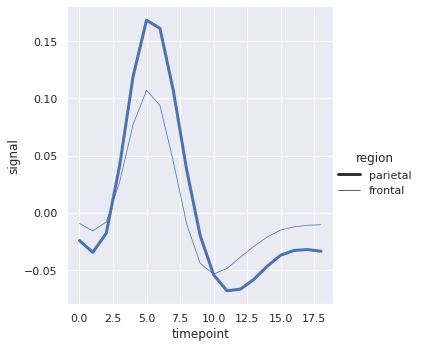

In [67]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", size = "region", ci = None);

(se ha eliminado el intervalo de confianza para poder visualizar mejor las líneas).

## Facets
Vemos que, aun cuando es técnicamente posible aumentar el número de dimensiones mostradas en una gráfica, el resultado no siempre es tan comprensible como desearíamos. Una alternativa es la generación de múltiples gráficas, cada una mostrando los datos relativos a un valor de la dimensión adicional. Estas **gráficas múltiples** es lo que en seaborn se denominan **facets**. Veamos un ejemplo: Ya hemos visto que podemos recurrir al uso de diferentes marcadores para diferenciar valores de una variable categórica:

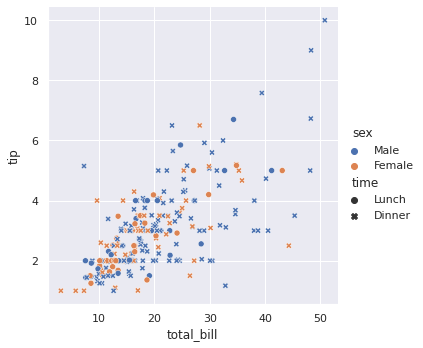

In [5]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "time");

En este ejemplo estamos cruzando las variables **tip** y **total_bill**, diferenciando los puntos según el **sexo** de la persona que dejó la propina (azul hombres y naranja mujeres), y usando símbolos distintos (puntos y aspas) para diferenciar la comida en cuestión: el punto representa un almuerzo y el aspa una cena. Esto nos lleva a tener puntos azules y puntos naranjas (representando hombre-almuerzo y mujer-almuerzo, respectivamente) y aspas azules y aspas naranjas (representando hombre-cena y mujer-cena). Pues bien, con el parámetro **col** podemos mostrar en columnas los datos correspondientes a valores distintos de una variable, por ejemplo, la variable **time** indicando el tipo de comida:

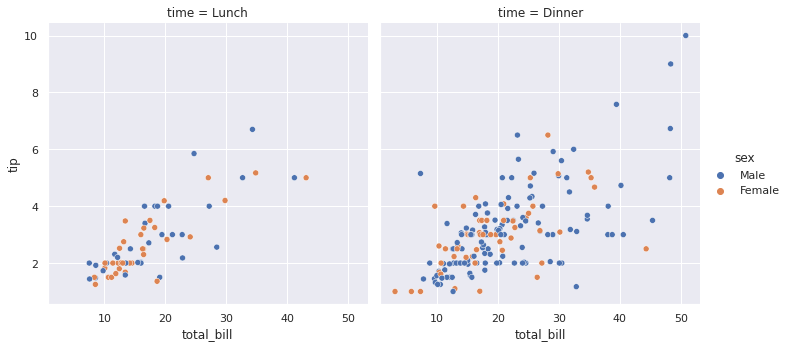

In [6]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, col = "time");

Ahora, lo que antes eran puntos representando almuerzos es ahora una gráfica -la de la izquierda- que solo muestra dicha información. Y lo que eran aspas indicando cenas es ahora también una gráfica independiente -la de la derecha-. La información es mucho más clara ahora que antes.

También es posible mostrar las gráficas en filas usando el parámetro **row**. En el siguiente ejemplo volvemos a cruzar las variables tip y total_bill, desglosando la información por sexo (y mostrando este desglose con diferentes colores) y desglosamos a su vez la gráfica en dos: una con información sobre fumadores y otra con información sobre no fumadores:

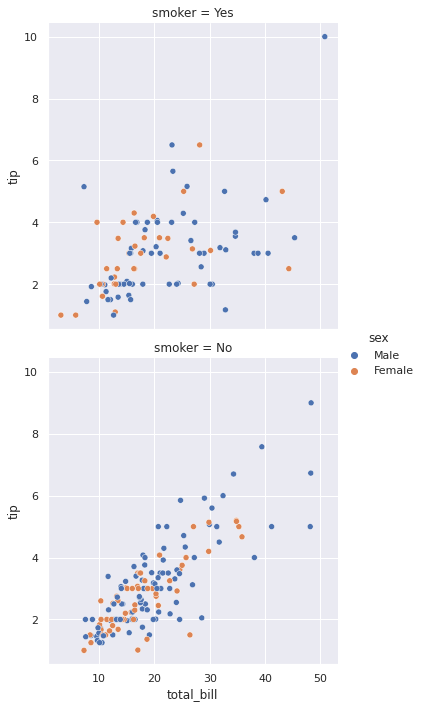

In [7]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker");

Por supuesto, podemos combinar los parámetros **row y col** para desglosar nuestra gráfica base según dos criterios adicionales (lo que supone añadir dos dimensiones a la visualización). En el siguiente ejemplo combinamos los dos ejemplos anteriores, mostrando en filas el hecho de que el cliente sea o no fumador, y en filas el tipo de comida:

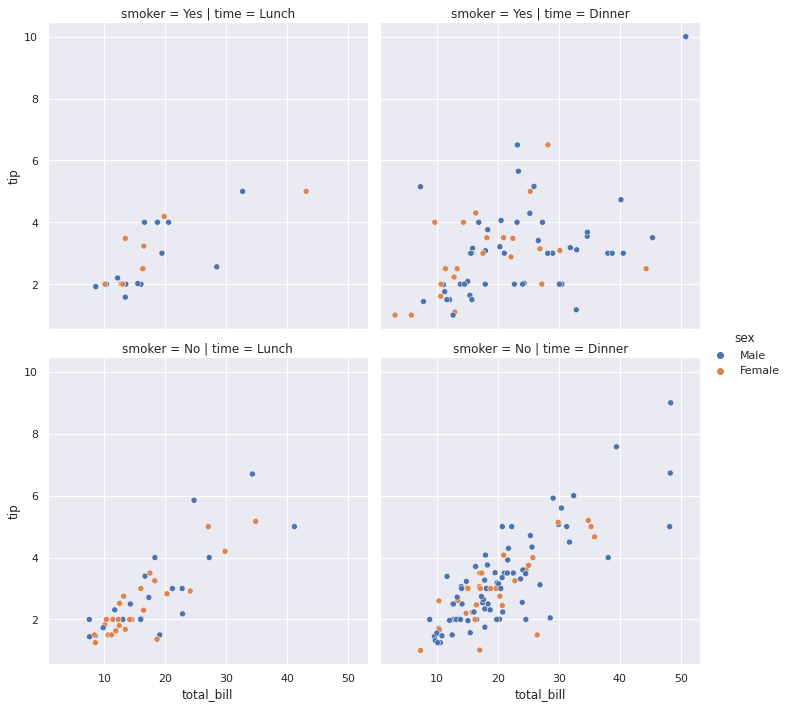

In [8]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker", col = "time");